In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

## Imports

In [3]:
import pyspark
from pyspark.sql.functions import col
from ifood_case.data_visualizer import DataVisualizer
from ifood_case.data_processing import DataProcessing

## Initialize Spark

In [4]:
spark = pyspark.sql.SparkSession.builder.appName("ifood-case").getOrCreate()

25/09/23 19:19:17 WARN Utils: Your hostname, solid resolves to a loopback address: 127.0.0.2; using 192.168.0.39 instead (on interface enp5s0)
25/09/23 19:19:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/23 19:19:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/09/23 19:19:18 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


## Load Data 

In [5]:
offers = spark.read.json("../data/raw/offers.json")
transactions = spark.read.json("../data/raw/transactions.json")
profile = spark.read.json("../data/raw/profile.json")

## Data Exploration

In [7]:
data_processing = DataProcessing(offers, transactions, profile)

In [8]:
df_joined, offers, transactions, profile = data_processing.transform()

In [9]:
data_visualizer = DataVisualizer(offers, transactions, profile, df_joined)

### Univariate Analysis 

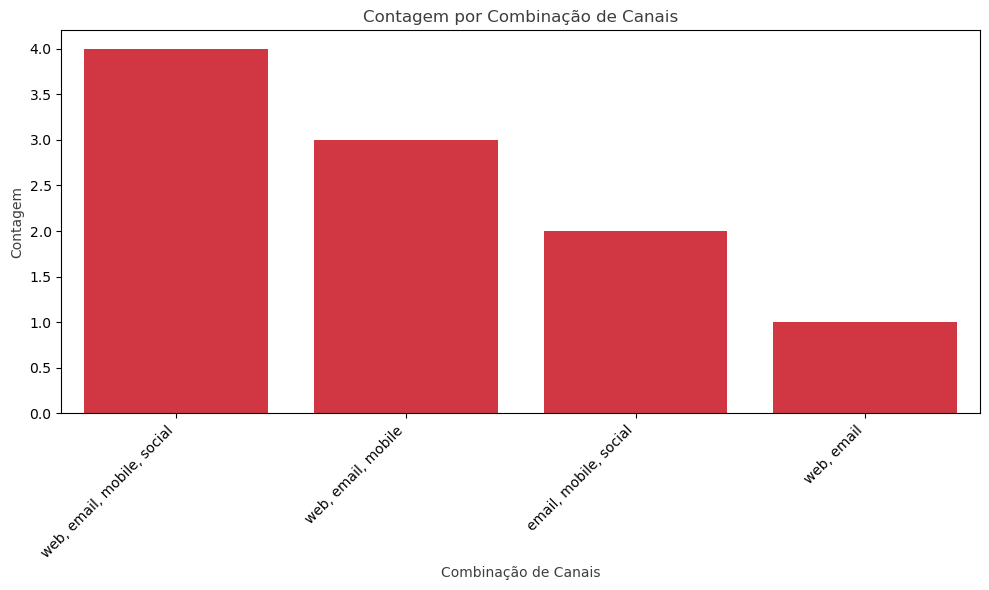

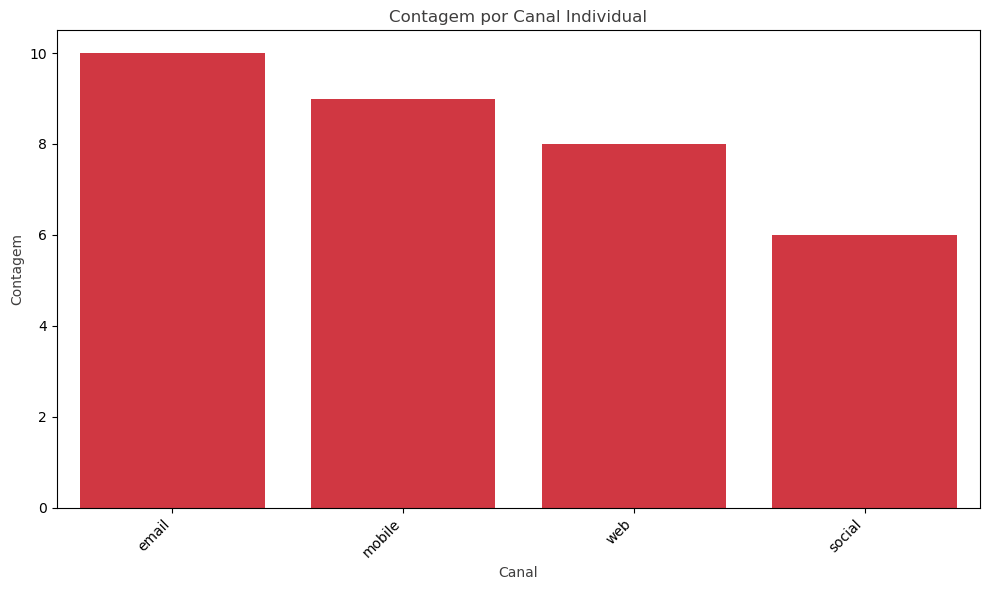

In [10]:
data_visualizer.plot_barplot_channels()

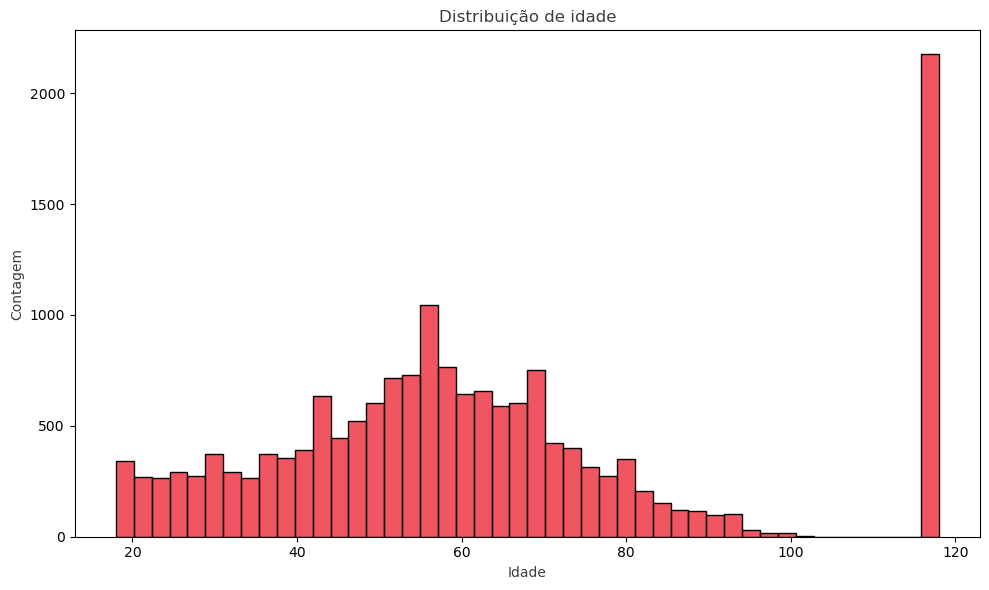

In [11]:
data_visualizer.plot_histogram_age()

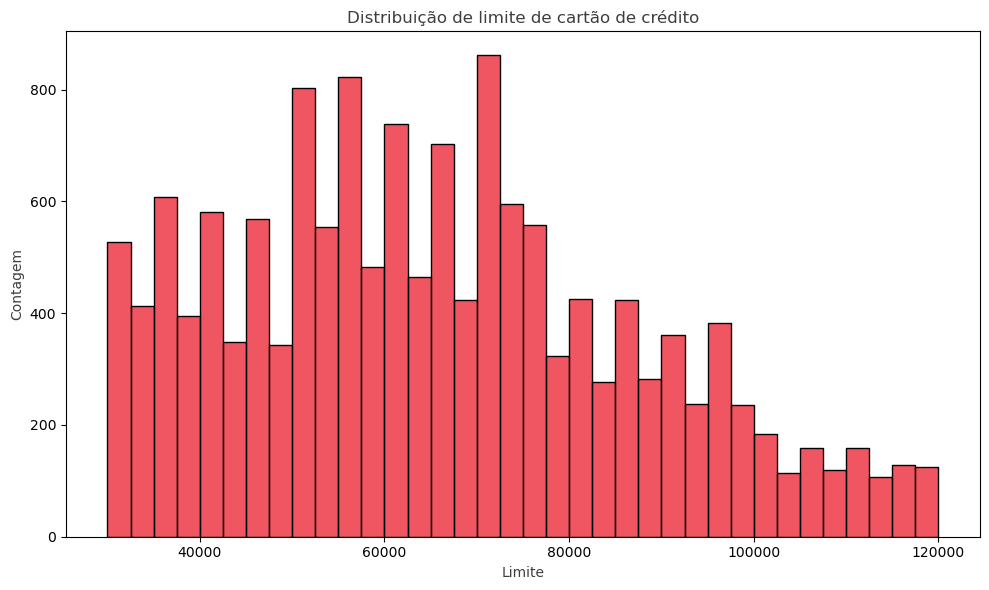

In [12]:
data_visualizer.plot_histogram_credit_card_limit()

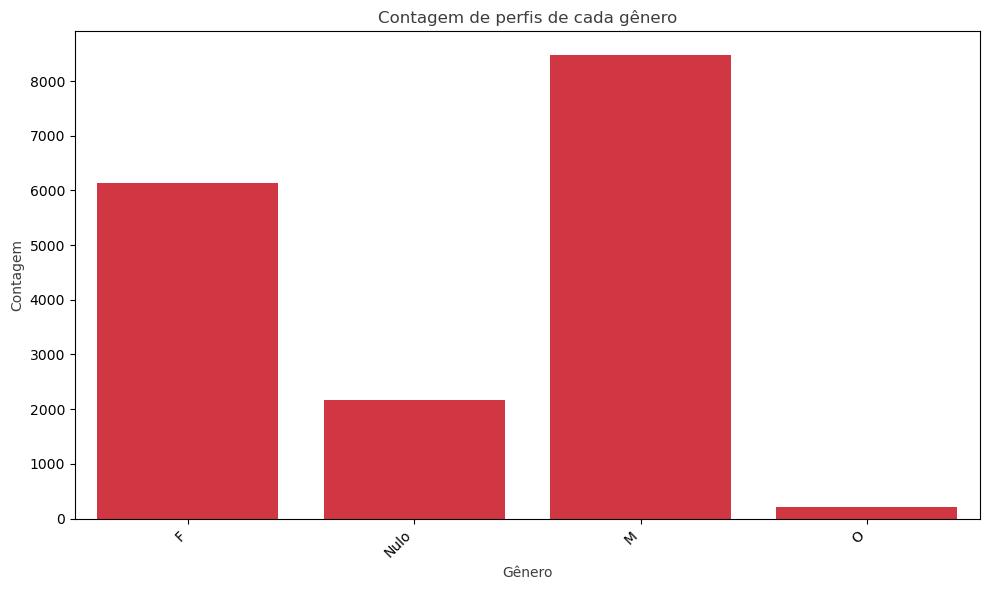

In [13]:
data_visualizer.plot_barplot_gender()

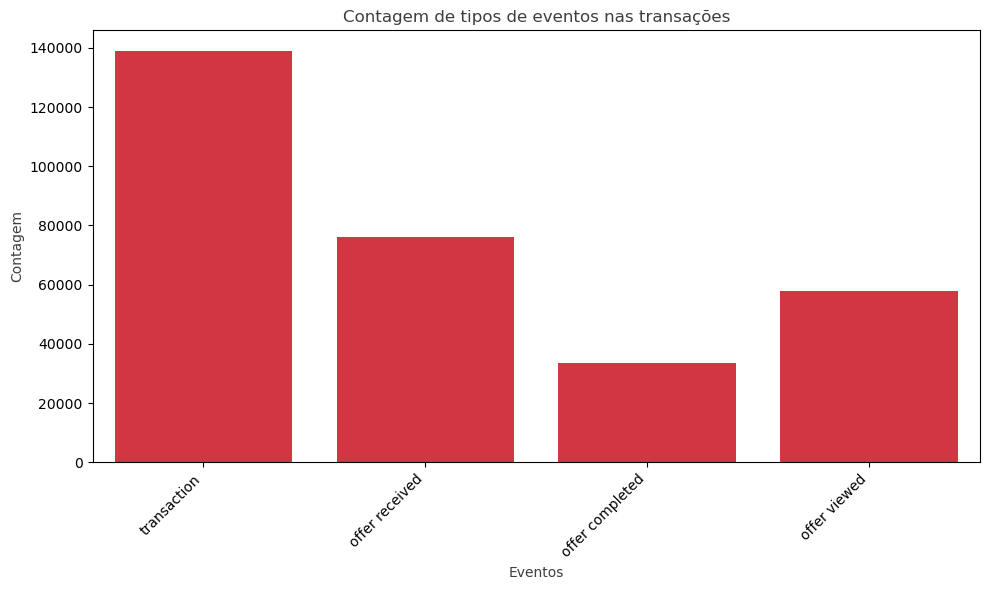

In [14]:
data_visualizer.plot_barplot_event()

### Bivariate Analysis 

/home/felipemarcelino/Projects/ifood-case/src/ifood_case/data_visualizer.py:165: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.histplot(data=limit_age, x="credit_card_limit", hue="age_group", palette=IFOOD_PALETTE)


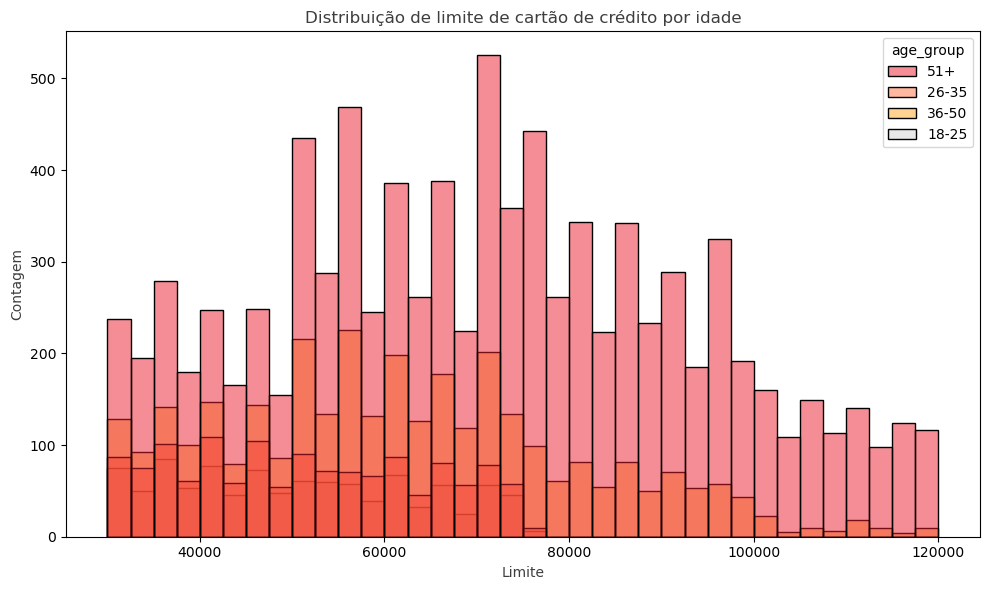

In [15]:
data_visualizer.plot_histogram_age_credit_card_limit()

/home/felipemarcelino/Projects/ifood-case/src/ifood_case/data_visualizer.py:178: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.histplot(data=limit_gender, x="credit_card_limit", hue="gender", palette=IFOOD_PALETTE)


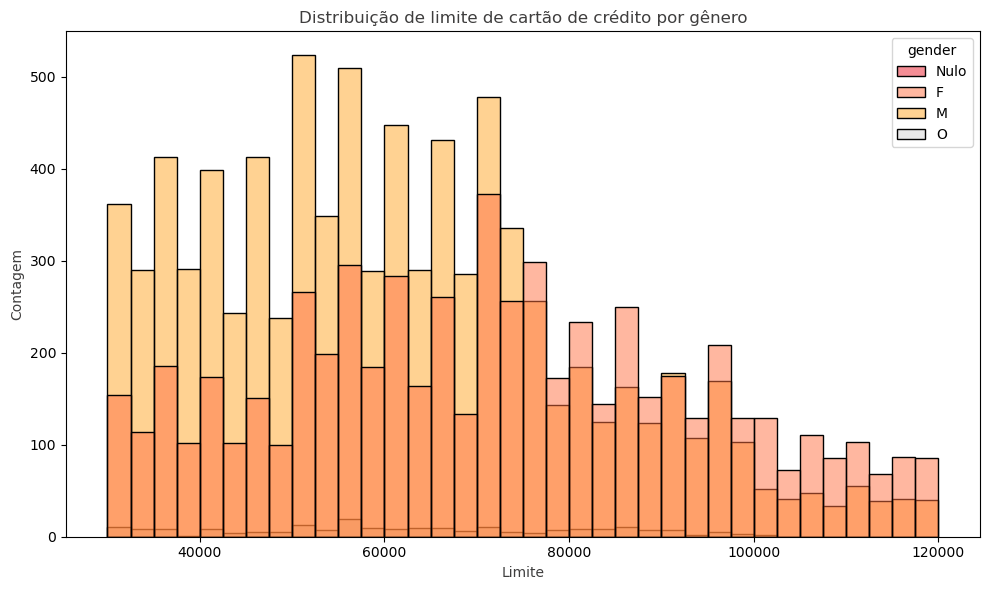

In [16]:
data_visualizer.plot_histogram_gender_credit_card_limit()

### Multivariate Analysis 

/home/felipemarcelino/Projects/ifood-case/src/ifood_case/data_visualizer.py:202: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  g = sns.catplot(


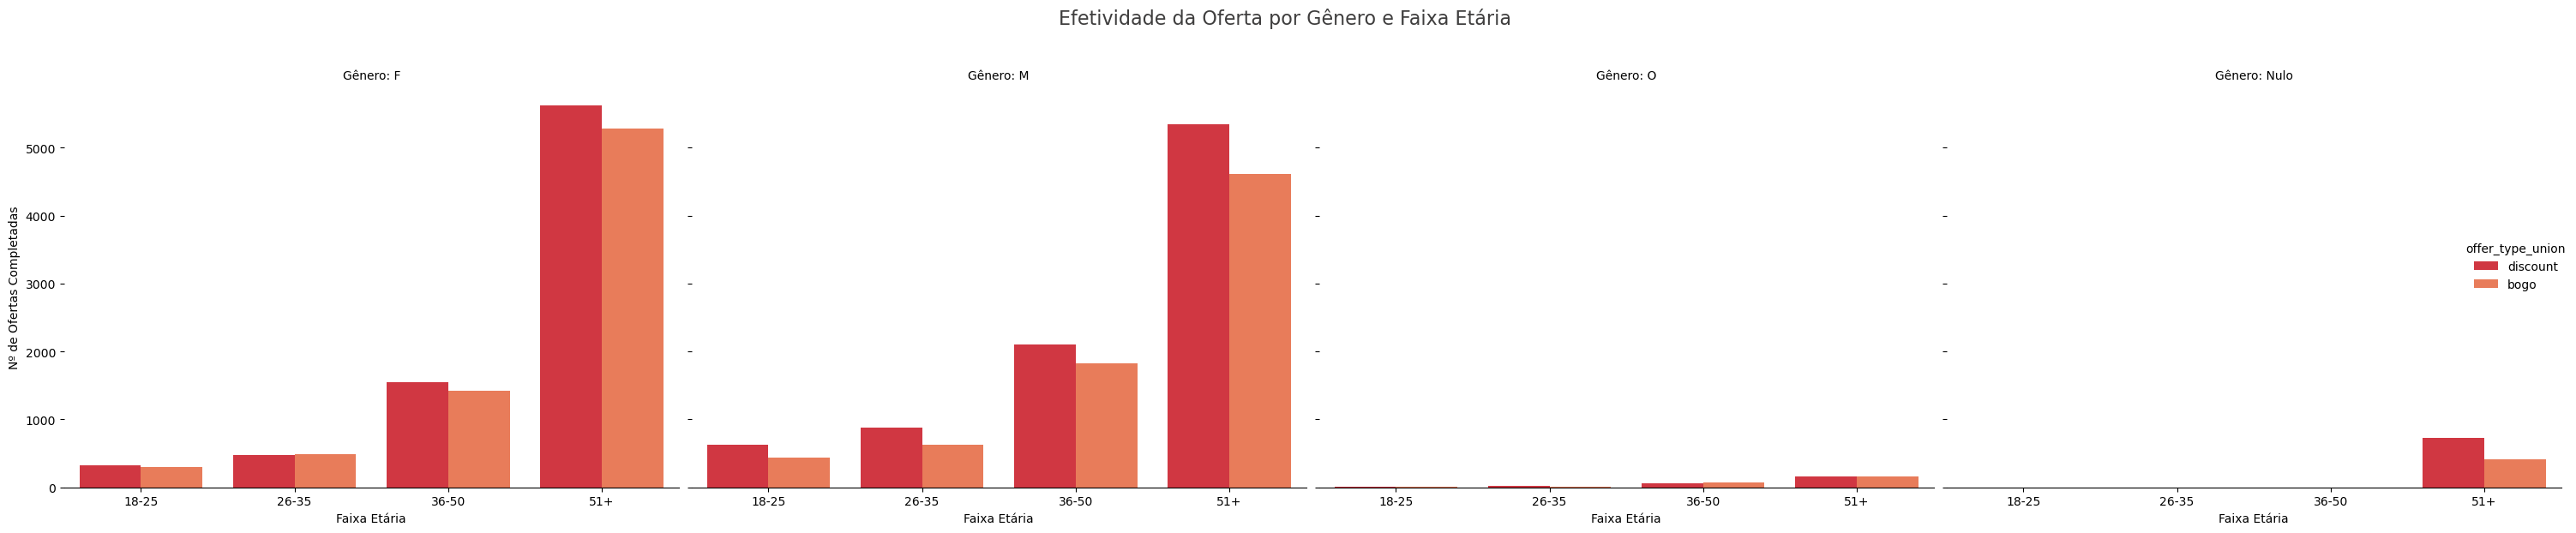

In [17]:
data_visualizer.plot_offer_effectiveness_by_profile()

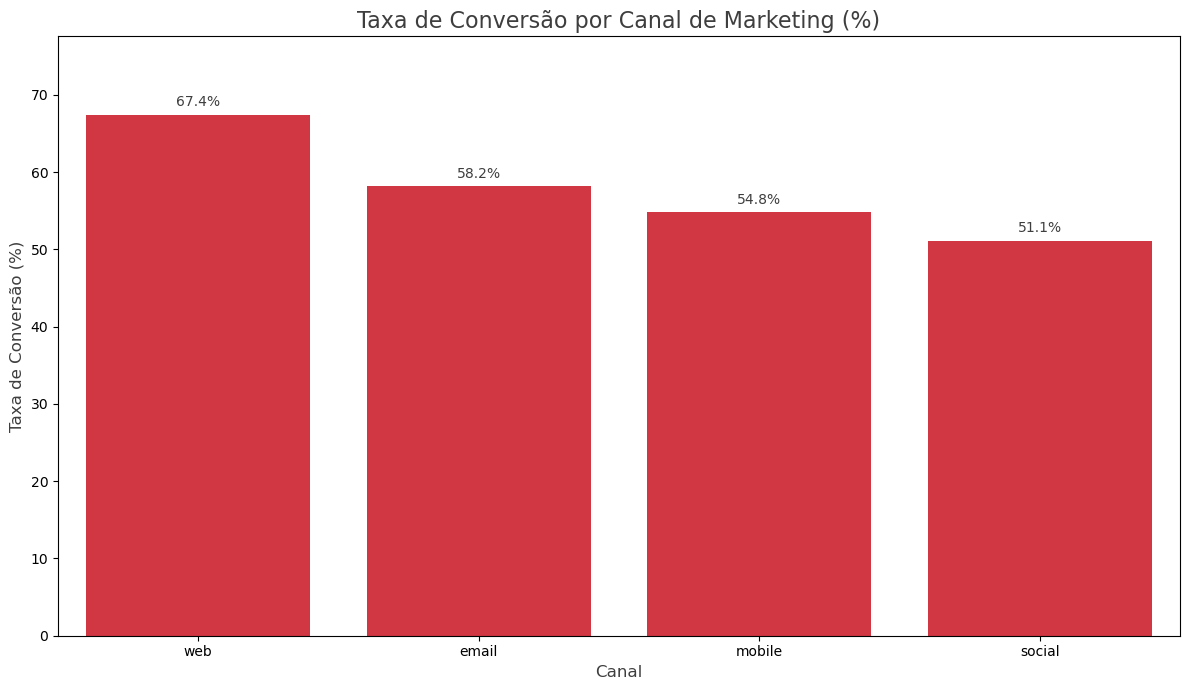

In [18]:
data_visualizer.plot_conversion_rate_by_channel()

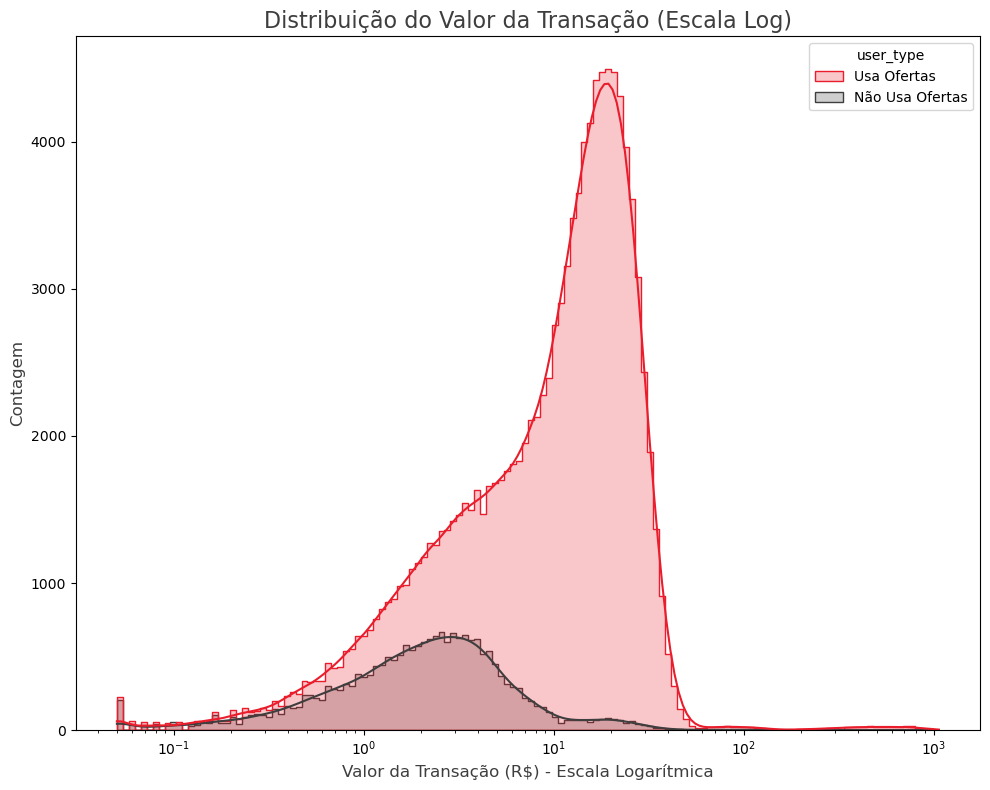

In [19]:
data_visualizer.plot_transaction_value_by_offer_usage()

/home/felipemarcelino/Projects/ifood-case/src/ifood_case/data_visualizer.py:399: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  g = sns.catplot(


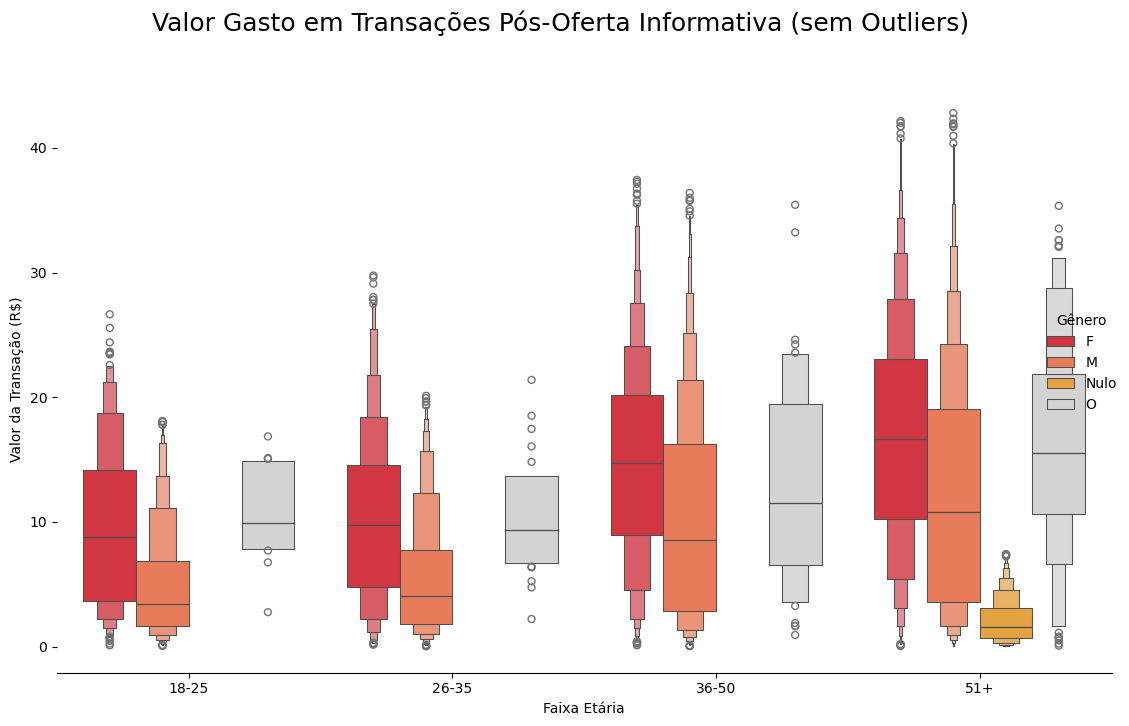

In [20]:
data_visualizer.plot_informational_offer_impact()

Iniciando a análise de engajamento temporal por perfil...


/home/felipemarcelino/Projects/ifood-case/src/ifood_case/data_visualizer.py:458: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(


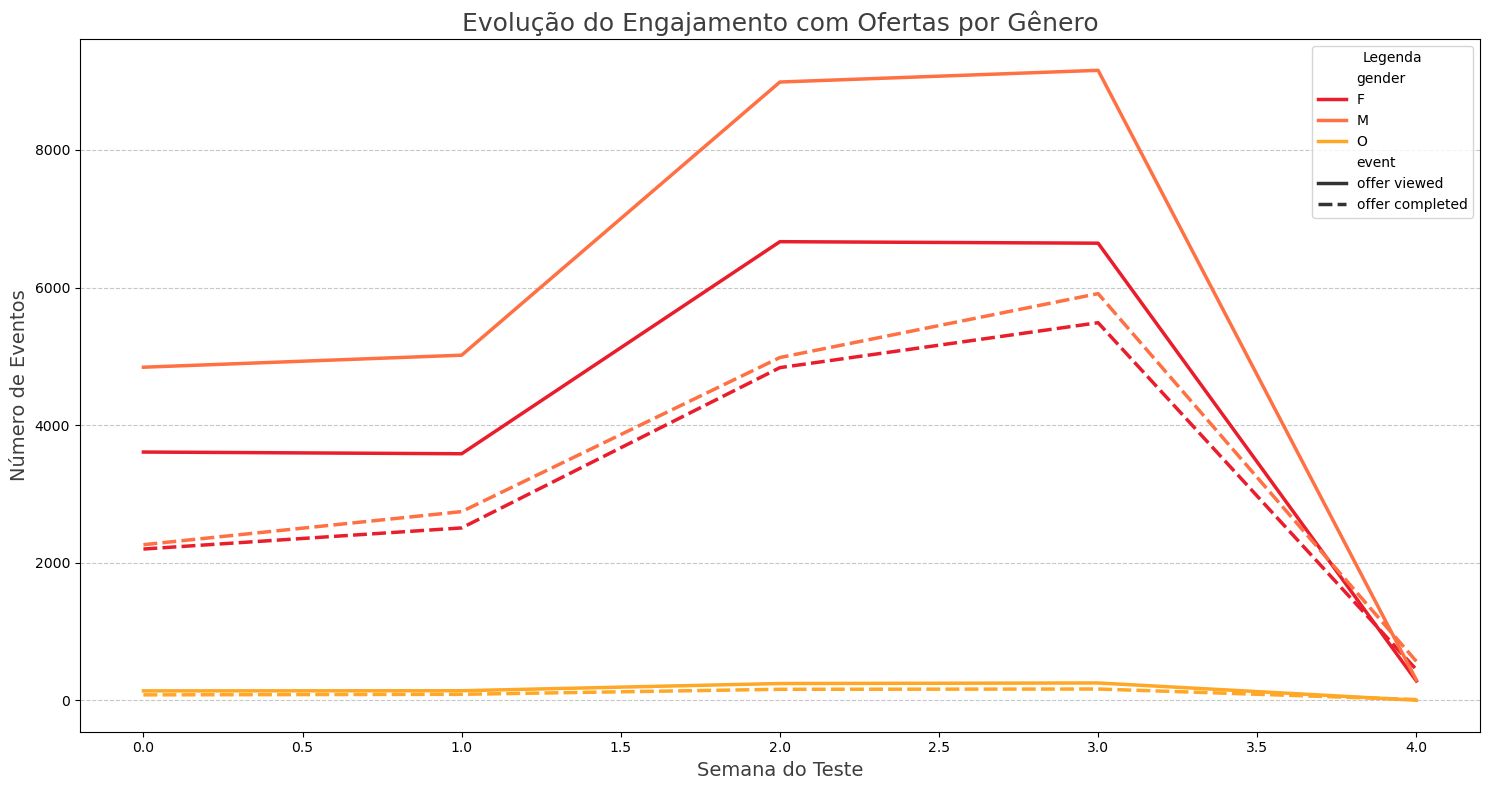

/home/felipemarcelino/Projects/ifood-case/src/ifood_case/data_visualizer.py:477: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(


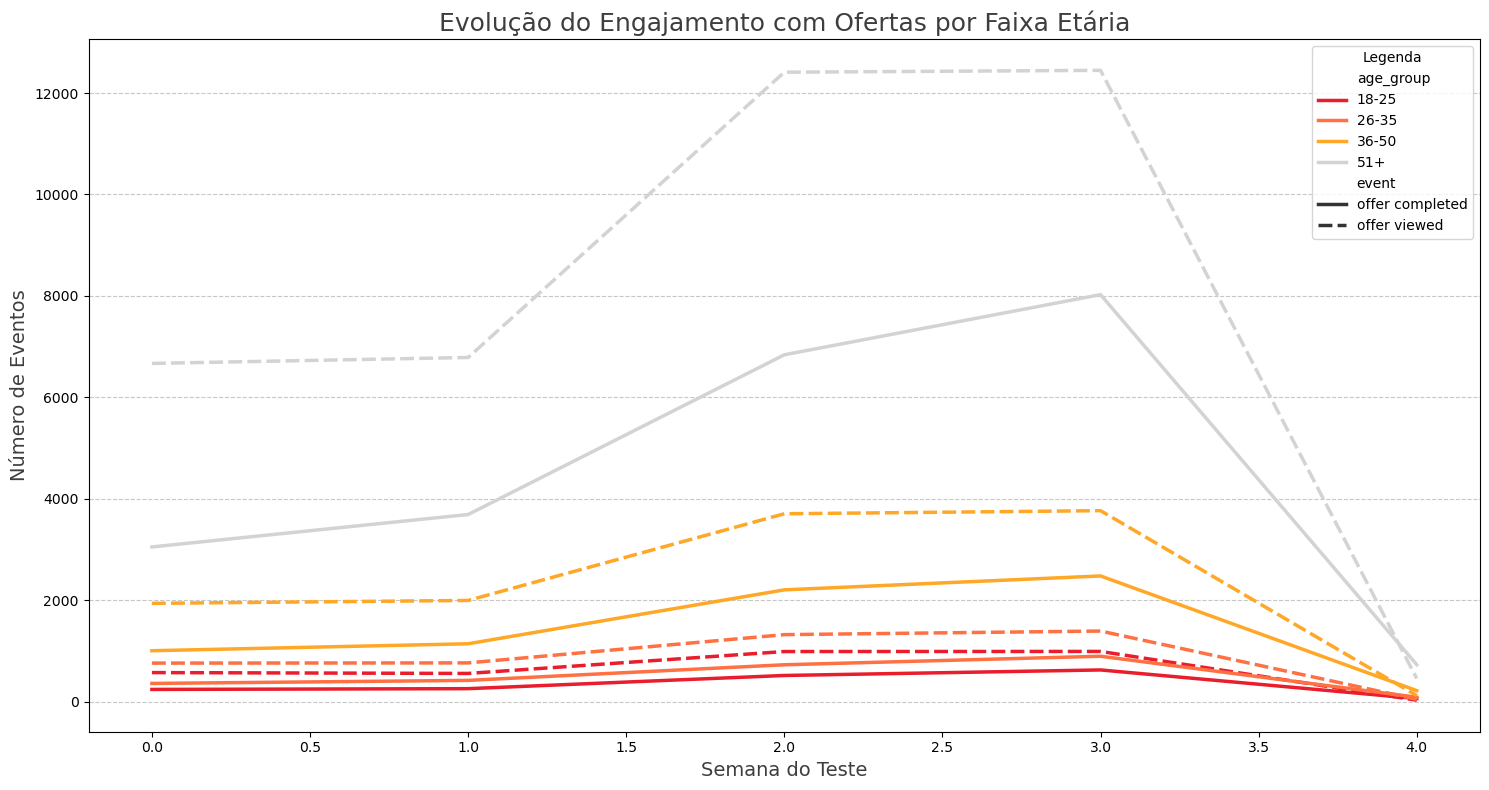

In [21]:
data_visualizer.plot_engagement_over_time_by_profile()

### Saving

In [22]:
offers.write.mode("overwrite").parquet("../data/processed/offers_processed")
transactions.write.mode("overwrite").parquet("../data/processed/transactions_processed")
profile.write.mode("overwrite").parquet("../data/processed/profile_processed")